### Slade Brooks
### brooksl@mail.uc.edu
### Exam 2

In [24]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part A

In [25]:
# create function for function
def f(x): return (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

# set up range of vals
xs = np.linspace(0, 1, 100)

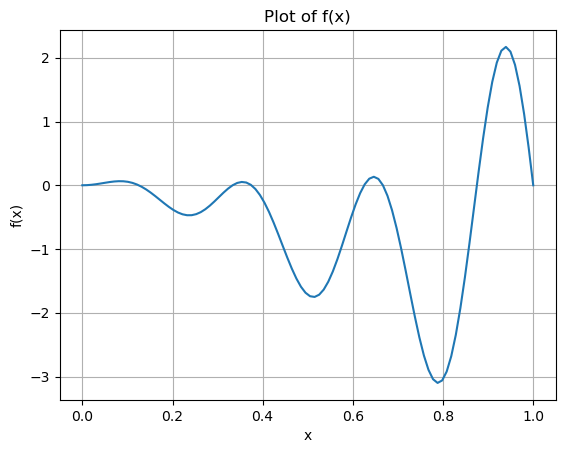

In [26]:
# plot function
plt.plot(xs, f(xs))
plt.xlabel("x")
plt.grid()
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.show()

# Part B

In [32]:
# find first root range with rootsearch
a, b = pyvot.rootsearch(f, 0.01, 1, 0.01)

# also find ranges of next 2 roots
a1, b1 = pyvot.rootsearch(f, b, 1, 0.01)
a2, b2 = pyvot.rootsearch(f, b1, 1, 0.01)

# use bisection to find roots at each point
r = pyvot.bisection(f, a, b)
r1 = pyvot.bisection(f, a1, b1)
r2 = pyvot.bisection(f, a2, b2)

# print roots
print("The first 3 positive roots are: {0:.6f}, {1:.6f}, and {2:.6f}".format(r, r1, r2))

The first 3 positive roots are: 0.125000, 0.333333, and 0.375000
